# Visualização de Dados - Exercício 1

O objetivo deste trabalho é realizar um scatter plot utilizando uma biblioteca com Grammar of Graphics.
Optou-se por utilizar o VegaLite através da biblioteca VegaLite.jl implementada para Julia.

Esta biblioteca permite tanto o uso de VegaLite nativo como através de um wrapper em Julia. Neste notebook as duas
formas serão utilizadas.

Note que pare poder visualizar os gráficos com a iteratividade é necessário rodar este notebook utilizando
Jupyter Lab v1.0.

In [4]:
using VegaLite, VegaDatasets

┌ Info: Precompiling VegaDatasets [0ae4a718-28b7-58ec-9efb-cded64d6d5b4]
└ @ Base loading.jl:1278


In [5]:
df = dataset("cars")

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""chevrolet chevelle malibu""",18.0,8,307.0,130,3504,12.0,"""1970-01-01""","""USA"""
"""buick skylark 320""",15.0,8,350.0,165,3693,11.5,"""1970-01-01""","""USA"""
"""plymouth satellite""",18.0,8,318.0,150,3436,11.0,"""1970-01-01""","""USA"""
"""amc rebel sst""",16.0,8,304.0,150,3433,12.0,"""1970-01-01""","""USA"""
"""ford torino""",17.0,8,302.0,140,3449,10.5,"""1970-01-01""","""USA"""
"""ford galaxie 500""",15.0,8,429.0,198,4341,10.0,"""1970-01-01""","""USA"""
"""chevrolet impala""",14.0,8,454.0,220,4354,9.0,"""1970-01-01""","""USA"""
"""plymouth fury iii""",14.0,8,440.0,215,4312,8.5,"""1970-01-01""","""USA"""
"""pontiac catalina""",14.0,8,455.0,225,4425,10.0,"""1970-01-01""","""USA"""
"""amc ambassador dpl""",15.0,8,390.0,190,3850,8.5,"""1970-01-01""","""USA"""


In [63]:
using DataFrames
pd = DataFrames
cars = pd.DataFrame(Miles_per_Gallon=df.data[:Miles_per_Gallon], Horsepower= df.data[:Horsepower]*10);

Primeiro vamos fazer uma visualização simples, utilizando inicialmente o framework em Julia, seguido do
VegaLite nativo.

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


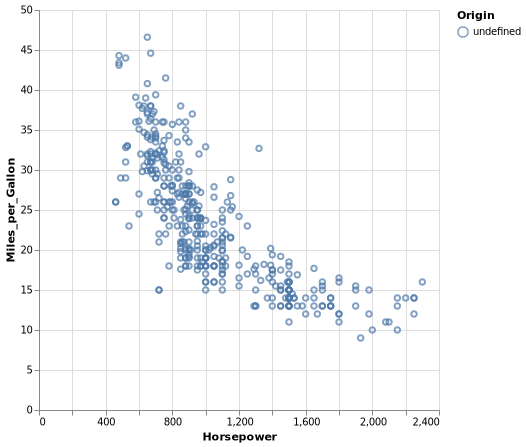

In [64]:
cars |>
@vlplot(
    :point,
    x=:Horsepower,
    y=:Miles_per_Gallon,
    color=:Origin,
    width=400,
    height=400
)

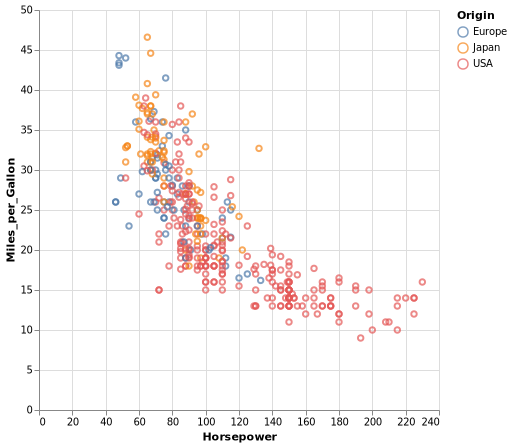

In [6]:
df |>
@vlplot(
    :point,
    x=:Horsepower,
    y=:Miles_per_Gallon,
    color=:Origin,
    width=400,
    height=400
)

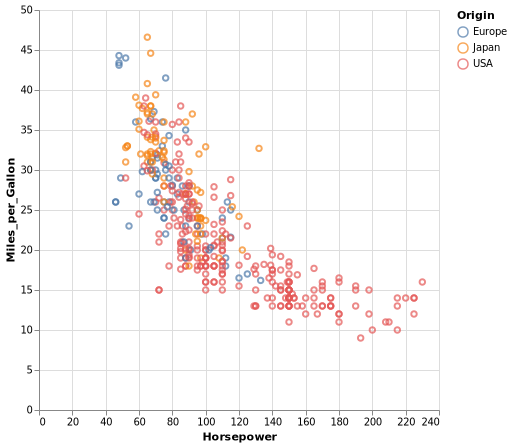

In [7]:
df |> vl"""
{
  "mark": "point",
  "width": 400,
  "height": 400,
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "color": {
      "field": "Origin", "type":"nominal"
    }
  }
}
"""

Vamos alterar o tamanho de cada ponto mapeando seu valor ao de uma variável
do dataset.

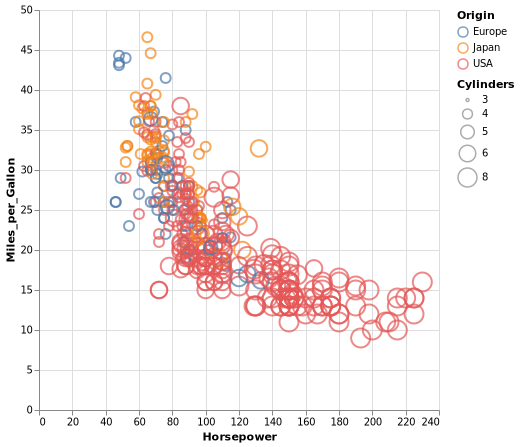

In [8]:
# Neste exemplo fizemos uma pequena modificação na maneira de declarar as variáveis do gráfico.
# Note que aqui utilizamos aspas invés da notação de Julia, e ao final do nome colocamos ":(letra)"
# Cada (letra) representa o tipo do dado (o = ordinal, n = nominal, q = quantitativo)
df |>
@vlplot(
    :point,
    x="Horsepower:q",
    y="Miles_per_Gallon:q",
    size="Cylinders:o",
    color="Origin:n",
    width=400,
    height=400
)

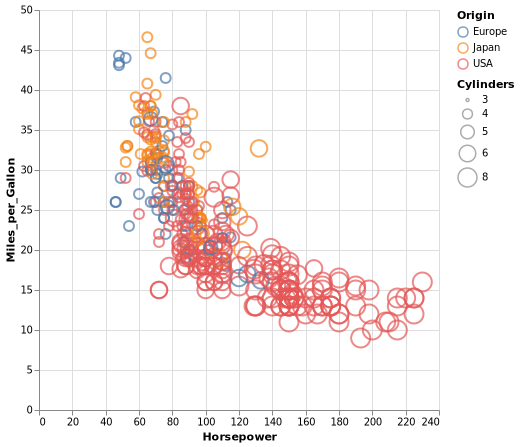

In [9]:
df |> vl"""
{
  "mark": "point",
  "width": 400,
  "height": 400,
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "color": {
      "field": "Origin", "type":"nominal"
    },
    "size":{"field":"Cylinders","type":"ordinal"}
  }
}
"""

A quantidade de informações pode estar excessiva para apenas um gráfico. Vamos invés disso plotar gráficos diferentes em cada coluna de acordo com o valor o país de origem e trocar a cor pelo cilindro. 

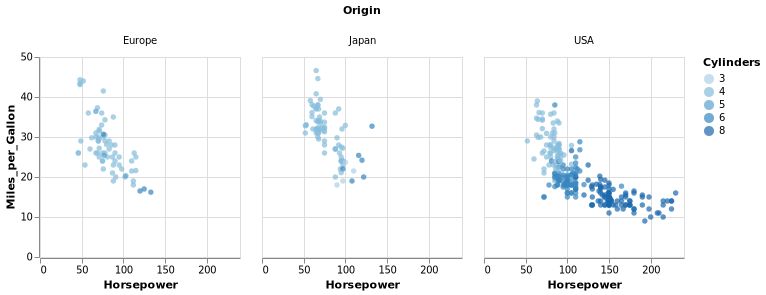

In [10]:
df |>
@vlplot(
    :circle,
    x="Horsepower:q",
    y="Miles_per_Gallon:q",
    color="Cylinders:o",
    column="Origin:n",
    width=200,
    height=200
)

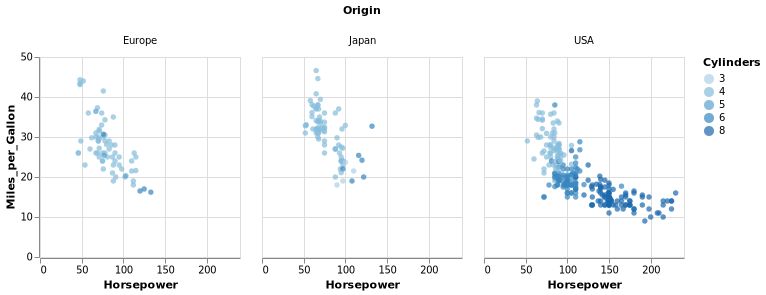

In [11]:
df |> vl"""
{
  "mark": "circle",
  "width": 200,
  "height": 200,
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "column": {
      "field": "Origin", "type":"nominal"
    },
    "color":{"field":"Cylinders","type":"ordinal"}
  }
}
"""

Finalmente, vamos adicionar um pouco de iteratividade no gráfico. Com a linha de código abaixo,
o usuário pode fazer "pan" e zoom no gráfico. Novamente repetimos o processo para o framework e em VegaLite nativo.

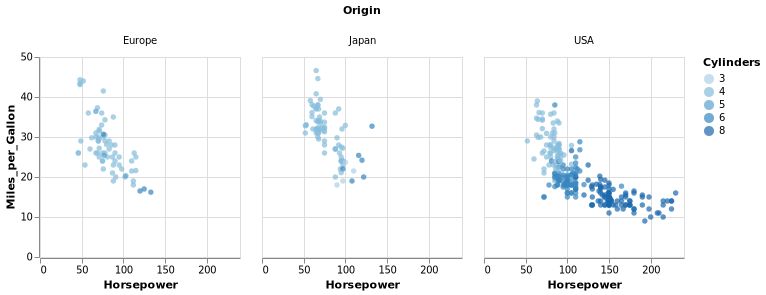

In [15]:
df |>
@vlplot(
    :circle,
    x="Horsepower:q",
    y="Miles_per_Gallon:q",
    color="Cylinders:o",
    column="Origin:n",
    width=200,
    height=200,
    selection={
        grid={
                type=:interval,
                resolve=:global,
                bind=:scales,
                translate="[mousedown[!event.shiftKey], window:mouseup] > window:mousemove!",
                zoom="wheel![!event.shiftKey]"
            }
    }
)

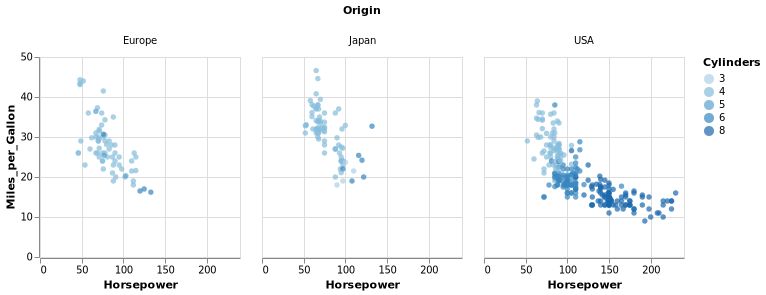

In [13]:
df |> vl"""
{
  "selection":{
      "grid": {
        "type": "interval",
        "resolve": "global",
        "bind": "scales",
        "translate": "[mousedown[!event.shiftKey], window:mouseup] > window:mousemove!",
        "zoom": "wheel![!event.shiftKey]"
      }
  },
  "mark": "circle",
  "width": 200,
  "height": 200,
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "column": {
      "field": "Origin", "type":"nominal"
    },
    "color":{"field":"Cylinders","type":"ordinal"}
  }
}
"""

# Fim.